<a href="https://colab.research.google.com/github/PrashanthSai-K/Classification-Regression-Algos/blob/main/Classification_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CLASSIFICATION***

# ***Import required Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DataSets/mushrooms.csv")

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# ***Exploratory Data Analysis***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
edible=len(df[df['class']=='e'])
poisonous=len(df[df['class']=='p'])
print('There are',edible,'-Edible Mushrooms &',poisonous,'-Poisonous Mushrooms')

There are 4208 -Edible Mushrooms & 3916 -Poisonous Mushrooms


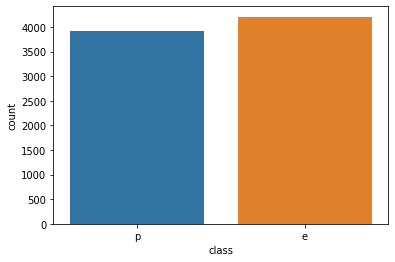

In [ ]:
sns.countplot(x='class',data=df)
plt.show()

# ***Categorical columns to Numerical***

In [ ]:
cat_cols=[]

In [ ]:
for x in df.columns:
  if df[x].dtype=='object':
    cat_cols.append(x)

In [ ]:
for x in cat_cols:
  df[x]=df[x].astype('category').cat.codes

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# ***Shuffling Dataset***

In [ ]:
df=df.sample(frac=1)

# ***Creating features & labels, Splitting to Train & Test***

In [ ]:
x=df.drop('class',axis=1)
y=df['class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# ***Creating Decision tree Classifier***

In [ ]:
clf_1=DecisionTreeClassifier()

In [ ]:
clf_1.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
clf_score=clf_1.score(x_test,y_test)

# ***Checking Actual vs Predicted Value***

In [ ]:
y_pred=clf_1.predict(x_test)
print('Actual Value:',np.array(y_test[:5]),'Predicted Value:',y_pred[:5])

Actual Value: [1 1 1 0 0] Predicted Value: [1 1 1 0 0]


# ***Plotting Confusion Matrix***

In [ ]:
def plot_cm(y_test,y_pred):
  conf_mat=confusion_matrix(y_test,y_pred)
  sns.heatmap(conf_mat,annot=True,cmap='Blues')
  plt.ylabel('Actual Label')
  plt.xlabel('Predicted Label')
  plt.show()

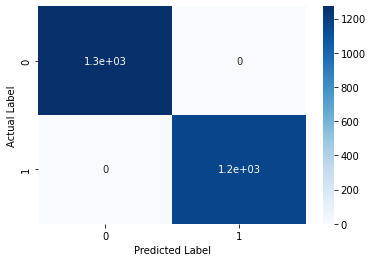

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00      1167

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# ***Creating Random Forest Classifier***

In [ ]:
clf_2=RandomForestClassifier()
clf_2.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rclf_score=clf_2.score(x_test,y_test)

In [ ]:
y_pred=clf_2.predict(x_test)

# ***Plotting Confusion Matrix***

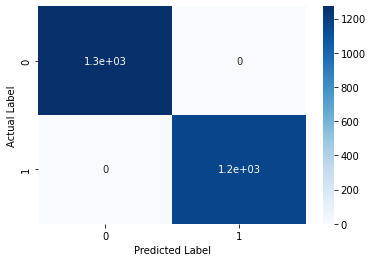

In [ ]:
plot_cm(y_test,y_pred)

# ***Analysing Random Forest Model with Classification report***

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00      1167

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# ***Plotting Decision Tree***

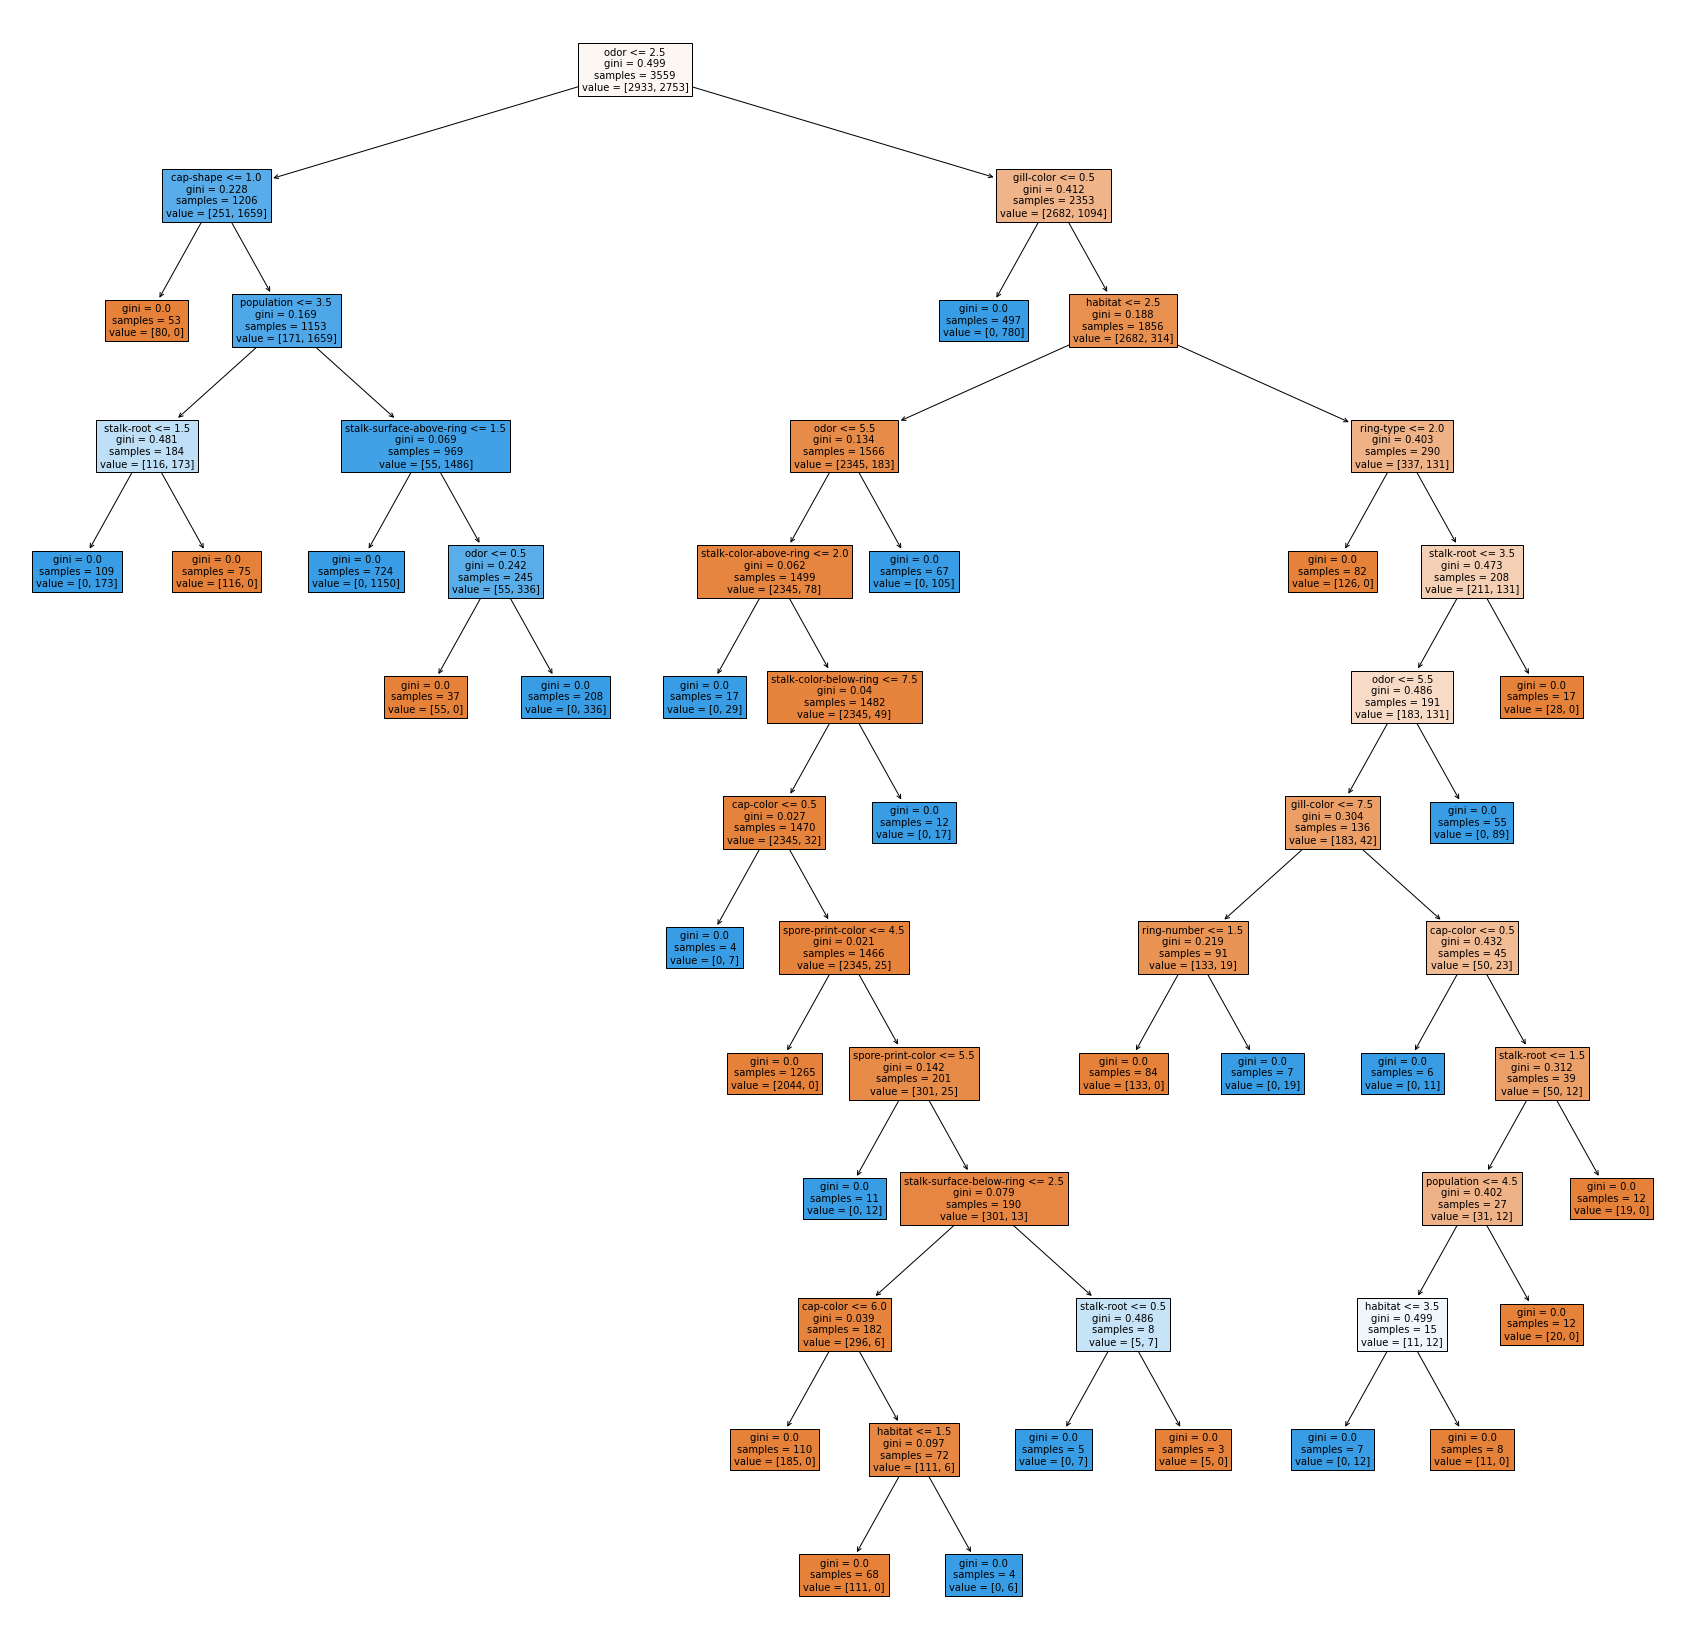

In [ ]:
plt.figure(figsize=(30,30))
plot_t=tree.plot_tree(clf_2.estimators_[0],filled=True,feature_names=x.columns,fontsize=10)

# ***Creating KNN Model***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# ***Checking Accuracy score & Classification report of the  KNN model***

In [ ]:
knn_score=np.round(knn.score(x_test,y_test),3)

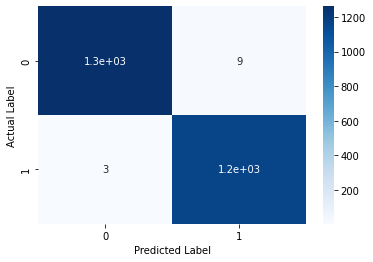

In [ ]:
plot_cm(y_test,knn.predict(x_test))


In [ ]:
print(classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1271
           1       0.99      1.00      0.99      1167

    accuracy                           1.00      2438
   macro avg       0.99      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# ***Creating Servo Vector Classification model***

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()

In [ ]:
svc.fit(x_train,y_train)

SVC()

# ***Checking Accuracy score & Classification report of the  SVC model***

In [ ]:
svc_score=np.round(svc.score(x_test,y_test),3)

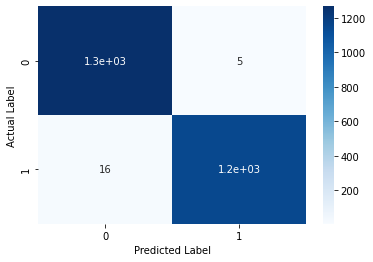

In [ ]:
plot_cm(y_test,svc.predict(x_test))

In [ ]:
print(classification_report(y_test,svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1271
           1       1.00      0.99      0.99      1167

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



# ***Creating Logistic Regression model***

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg=LogisticRegression()

In [ ]:
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# ***Checking Accuracy score & Classification report of the  Logistic Regression model***

In [ ]:
log_score=log_reg.score(x_test,y_test)

In [ ]:
y_pred=log_reg.predict(x_test)

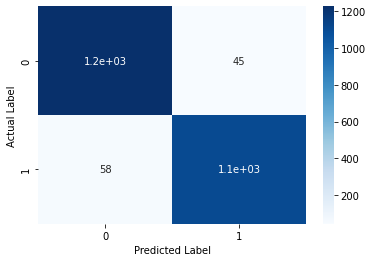

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1271
           1       0.96      0.95      0.96      1167

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



# ***Classification models Score***

In [ ]:
score=[clf_score,rclf_score,knn_score,svc_score,log_score]
model=['Decision Tree','Random Forest','KNearest','Support Vector','Logistic Regression']
scores=pd.DataFrame(model,columns=['Model'])
scores['Score']=score
scores

,Model,Score
0,Decision Tree,1.000000
1,Random Forest,1.000000
2,KNearest,0.995000
3,Support Vector,0.991000
4,Logistic Regression,0.957752


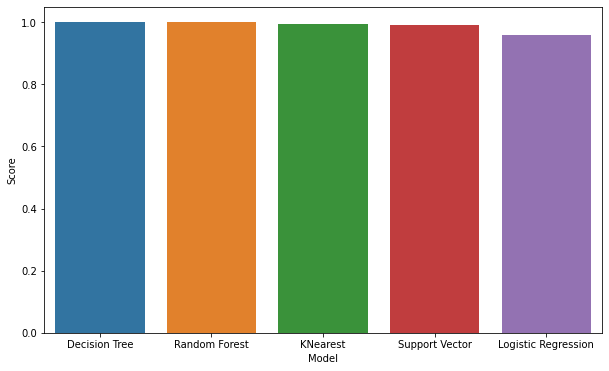

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model',y='Score',data=scores)

# ***Conclusion***

This project has extended our understanding of how to use different types of classification algorithms and estimate accuracy levels based on various types of data. Here we have used Supervised learning algorithms and these are very popular among a very wide range of applications.

# ***Regression***

# ***Importing dataset***

In [ ]:
rdf1=pd.read_csv("/content/drive/MyDrive/DataSets/housing.csv")

In [ ]:
rdf1.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [ ]:
x=rdf1.drop('MEDV',axis=1)
y=rdf1['MEDV']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_test

,RM,LSTAT,PTRATIO
15,5.834,8.47,21.0
250,6.842,6.90,13.0
142,5.403,26.82,14.7
392,6.852,19.78,20.2
90,6.417,8.81,17.8
...,...,...,...
443,6.701,16.42,20.2
246,6.108,6.57,16.4
300,6.122,5.98,18.4
485,6.120,9.08,21.0


# ***Creating Linear Regression model***

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

# ***Checking for Accracy score of the model***

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

9727501160.084389

In [ ]:
lin_score=r2_score(y_test,y_pred)

# ***Visualizing Actual vs Predicted***

Text(0.5, 1.0, 'Actual vs Plotted')

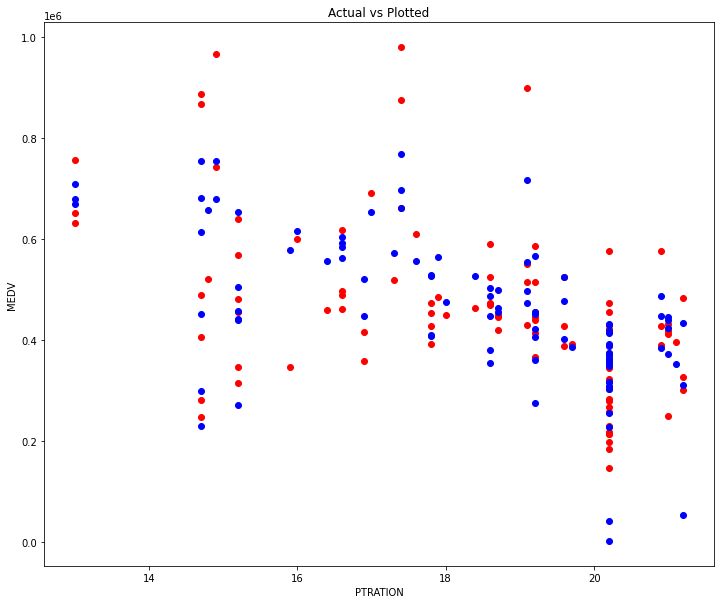

In [ ]:
ax=plt.figure(figsize=(12,10))
plt.scatter(x_test['PTRATIO'],y_test,color='red')
plt.scatter(x_test['PTRATIO'],y_pred,color='blue')
plt.xlabel('PTRATION')
plt.ylabel('MEDV')
plt.title('Actual vs Plotted')

# ***Creating KNN Regression model***

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=10)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
knn_score=r2_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

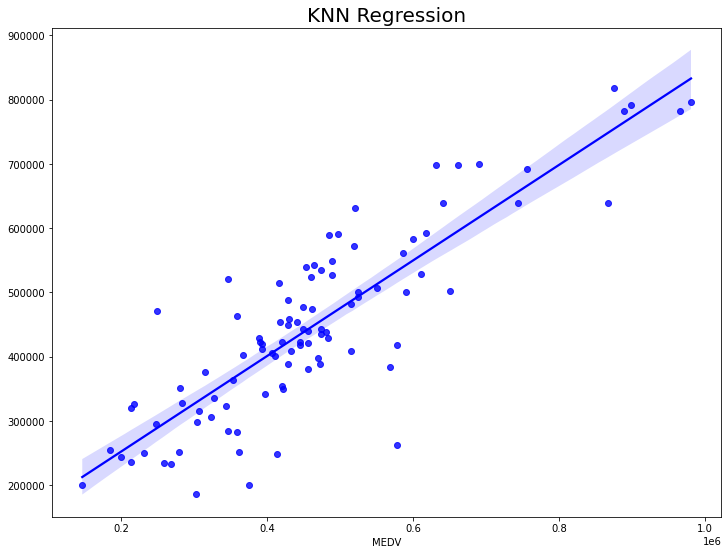

In [ ]:
fig=plt.figure(figsize=(12,9))
ax=sns.regplot(y_test,y_pred,marker='o',color="blue")
ax.set_title('KNN Regression',fontsize=20)
plt.show

# ***Creating Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred=log.predict(x_test)

In [ ]:
log_score=r2_score(y_test,y_pred)

Text(0.5, 1.0, 'Actual vs Plotted')

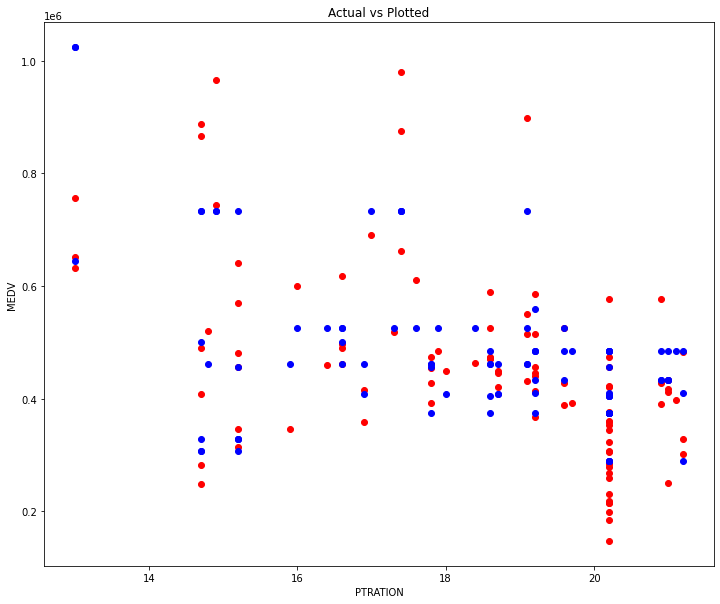

In [ ]:
ax=plt.figure(figsize=(12,10))
plt.scatter(x_test['PTRATIO'],y_test,color='red')
plt.scatter(x_test['PTRATIO'],y_pred,color='blue')
plt.xlabel('PTRATION')
plt.ylabel('MEDV')
plt.title('Actual vs Plotted')

# ***Creating Random forest Regreesion***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rlf=RandomForestRegressor()

In [ ]:


rlf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=rlf.predict(x_test)

In [ ]:
rlf_score=r2_score(y_test,y_pred)

Text(0.5, 1.0, 'Actual vs Plotted')

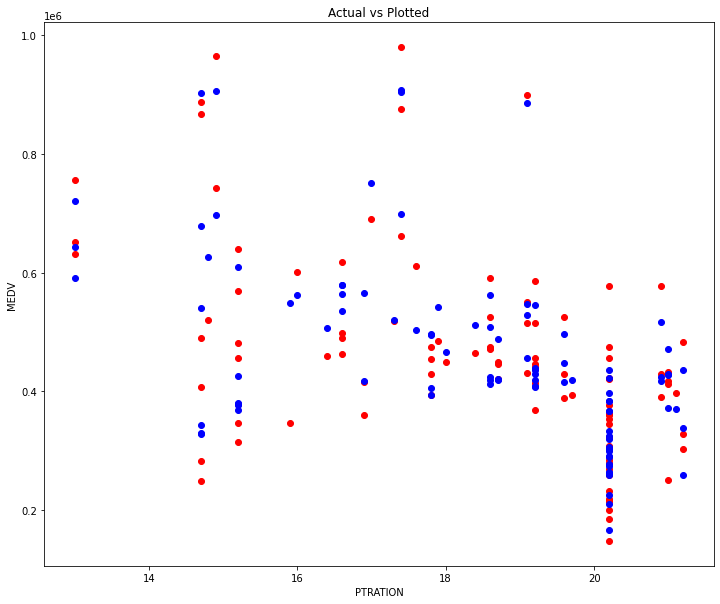

In [ ]:
ax=plt.figure(figsize=(12,10))
plt.scatter(x_test['PTRATIO'],y_test,color='red')
plt.scatter(x_test['PTRATIO'],y_pred,color='blue')
plt.xlabel('PTRATION')
plt.ylabel('MEDV')
plt.title('Actual vs Plotted')

# ***Creating Decisoin tree Regression***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf=DecisionTreeRegressor()

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
dec_score=r2_score(y_test,y_pred)

Text(0.5, 1.0, 'Actual vs Plotted')

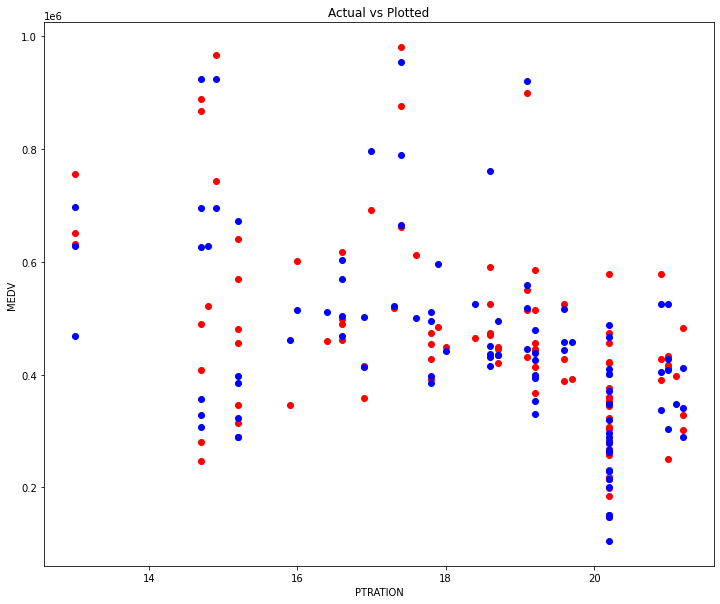

In [ ]:
ax=plt.figure(figsize=(12,10))
plt.scatter(x_test['PTRATIO'],y_test,color='red')
plt.scatter(x_test['PTRATIO'],y_pred,color='blue')
plt.xlabel('PTRATION')
plt.ylabel('MEDV')
plt.title('Actual vs Plotted')

# ***Classification Model Score***

In [ ]:
score=[lin_score,knn_score,log_score,rlf_score,dec_score]
model=['Linear Regression','KNearest','Logistic Regression','Random Forest','Decision Tree']
scores=pd.DataFrame(model,columns=['Model'])
scores['Score']=score
scores

,Model,Score
0,Linear Regression,0.657462
1,KNearest,0.734260
2,Logistic Regression,0.606967
3,Random Forest,0.806960
4,Decision Tree,0.690767


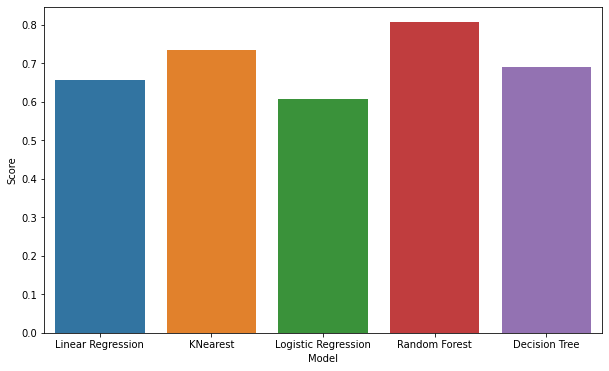

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model',y='Score',data=scores)

# ***Conclusion***

This project has extended our understanding of how to use different types of regression algorithms and estimate accuracy levels based on various types of data. Here we have used Supervised learning algorithms and these are very popular among a very wide range of applications.